In [117]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
from random import random
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import VotingClassifier

pd.set_option('display.max_columns', None)

df = pd.read_csv('train.csv').drop_duplicates().dropna().reset_index(drop=True)
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
178,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
179,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
180,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
181,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
182,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Variable Description¶
* PassengerId : unique id number to each passenger
* Survived: passenger survived (1), died (0)
* Pclass: passenger class
* Name: passenger name
* Sex: gender of passenger
* Age: age of passenger
* SibSp: number of siblings and children
* Parch: number of parents and children
* Ticket: ticket number
* Fare: amount of money that spent on ticket
* Cabin: cabin number
* Embarked: oırt where passenger embarked (C = Cherbourg, Q = Queenstown, S = Couthampton)

### pre-processing

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 17.3+ KB


In [119]:
df['Sex'] = [1 if item=='male' else 0 for item in df.Sex]
df[df.Age.isna()] = np.round(np.mean(df.Age),1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0.0,PC 17599,71.2833,C85,C
1,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0.0,113803,53.1000,C123,S
2,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",1.0,54.0,0.0,0.0,17463,51.8625,E46,S
3,11.0,1.0,3.0,"Sandstrom, Miss. Marguerite Rut",0.0,4.0,1.0,1.0,PP 9549,16.7000,G6,S
4,12.0,1.0,1.0,"Bonnell, Miss. Elizabeth",0.0,58.0,0.0,0.0,113783,26.5500,C103,S


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    float64
 1   Survived     183 non-null    float64
 2   Pclass       183 non-null    float64
 3   Name         183 non-null    object 
 4   Sex          183 non-null    float64
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    float64
 7   Parch        183 non-null    float64
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(8), object(4)
memory usage: 17.3+ KB


### feature engineering

In [121]:
df['Deck'] = [item.split(' ')[0][:1] if type(item) == str else None for item in df.Cabin]
df['Num'] = pd.to_numeric([item.split(' ')[0][1:] if type(item) == str else None for item in df.Cabin])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Num
0,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0.0,PC 17599,71.2833,C85,C,C,85.0
1,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0.0,113803,53.1000,C123,S,C,123.0
2,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",1.0,54.0,0.0,0.0,17463,51.8625,E46,S,E,46.0
3,11.0,1.0,3.0,"Sandstrom, Miss. Marguerite Rut",0.0,4.0,1.0,1.0,PP 9549,16.7000,G6,S,G,6.0
4,12.0,1.0,1.0,"Bonnell, Miss. Elizabeth",0.0,58.0,0.0,0.0,113783,26.5500,C103,S,C,103.0


{'C': 0.59, 'E': 0.73, 'G': 0.5, 'D': 0.74, 'A': 0.58, 'B': 0.64, 'F': 0.0}

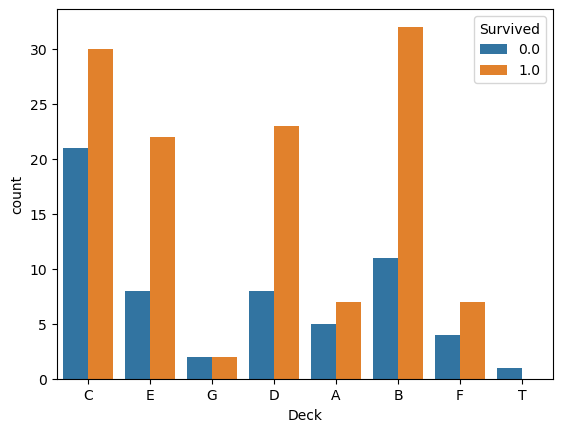

In [122]:
sns.countplot(data=df,x='Deck',hue='Survived')
df['deck_survival_rate'] = [np.round(len(df[(df.Deck==item)&(df.Survived==1)])/len(df[df.Deck==item]),2) for item in df.Deck]
dict(zip(df['Deck'].unique(),df['deck_survival_rate'].unique()))

{85.0: 1.0,
 123.0: 0.5,
 46.0: 0.0,
 6.0: 0.6,
 103.0: 0.75,
 56.0: 0.67,
 23.0: 0.33,
 33.0: 0.8,
 30.0: 0.4}

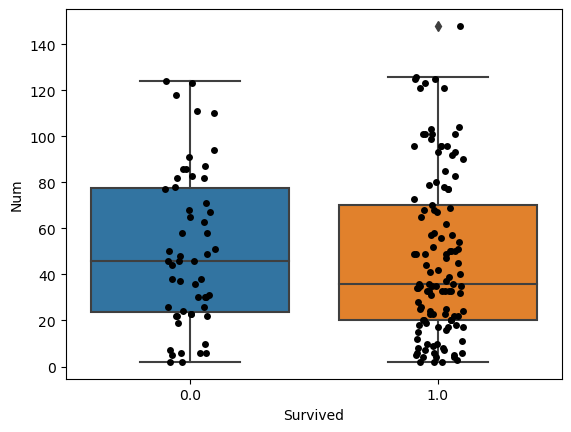

In [123]:
sns.boxplot(data=df,x='Survived',y='Num')
sns.stripplot(data=df,x='Survived',y='Num',color='black')
df['num_survival_rate'] = pd.to_numeric([np.round(len(df[(df.Num==item)&(df.Survived==1)])/len(df[df.Num==item]),2) if len(df[df.Num==item]) > 0 else None for item in df.Num])
df.loc[df['num_survival_rate'].isna(),'num_survival_rate'] = df['num_survival_rate'].median()
dict(zip(df['Num'].unique(),df['num_survival_rate'].unique()))

{'Mrs': 0.92,
 'Mr': 0.37,
 'Miss': 0.93,
 'Master': 1.0,
 'Dr': 0.67,
 'Mme': 0.5,
 'Major': 0.0}

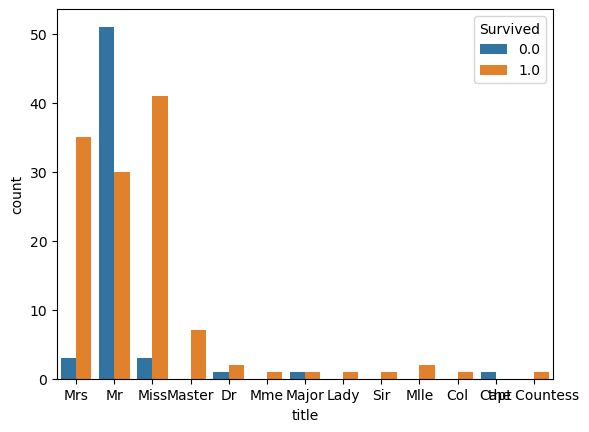

In [124]:
df['title'] = [name[name.find(',')+2:name.find('.')] for name in df.Name]
sns.countplot(data=df,x='title',hue='Survived')
df['title_survival_rate'] = [np.round(len(df[(df.title==item)&(df.Survived==1)])/len(df[df.title==item]),2) for item in df.title]
dict(zip(df['title'].unique(),df['title_survival_rate'].unique()))

{'C': 0.74, 'S': 0.64, 'Q': 0.5}

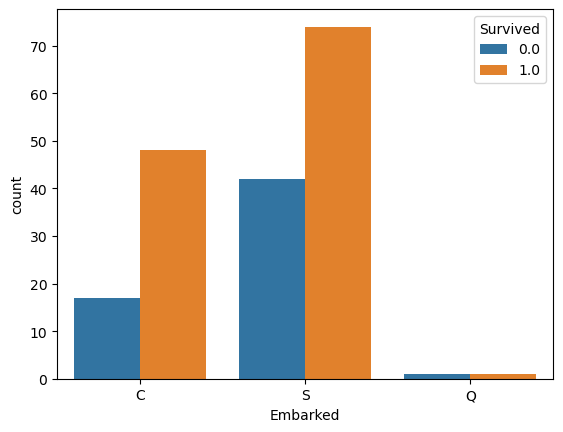

In [125]:
sns.countplot(data=df,x='Embarked',hue='Survived')
df['emb_survival_rate'] = [np.round(len(df[(df.Embarked==item)&(df.Survived==1)])/len(df[df.Embarked==item]),2) for item in df.Embarked]
dict(zip(df['Embarked'].unique(),df['emb_survival_rate'].unique()))

{1.0: 0.73, 0.0: 0.63, 3.0: 0.67, 2.0: 0.83}

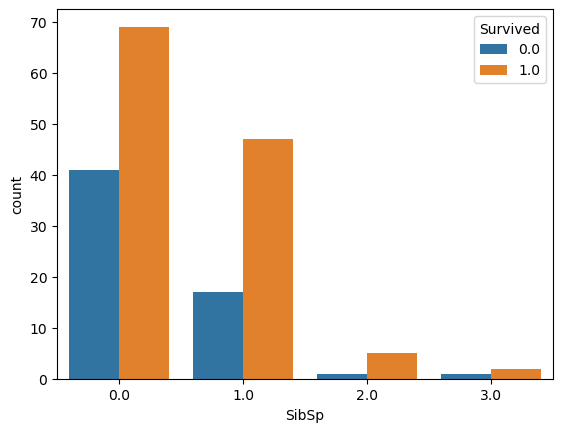

In [126]:
sns.countplot(data=df,x='SibSp',hue='Survived')
df['sib_survival_rate'] = [np.round(len(df[(df.SibSp==item)&(df.Survived==1)])/len(df[df.SibSp==item]),2) for item in df.SibSp]
dict(zip(df['SibSp'].unique(),df['sib_survival_rate'].unique()))

{0.0: 0.66, 1.0: 0.7, 2.0: 0.74, 4.0: 0.0}

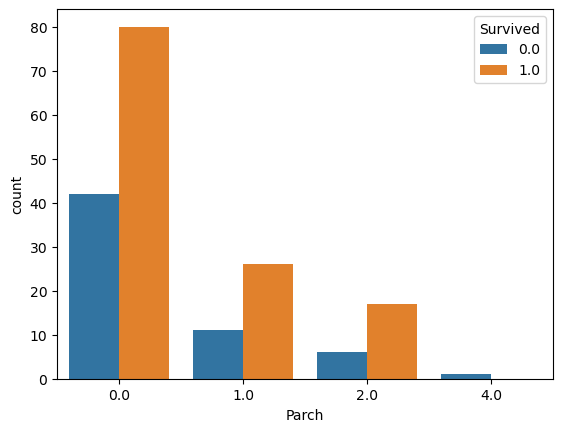

In [127]:
sns.countplot(data=df,x='Parch',hue='Survived')
df['parch_survival_rate'] = [np.round(len(df[(df.Parch==item)&(df.Survived==1)])/len(df[df.Parch==item]),2) for item in df.Parch]
dict(zip(df['Parch'].unique(),df['parch_survival_rate'].unique()))

In [128]:
df['Ticket'].value_counts()

113760      4
19950       4
PC 17582    3
35273       3
24160       3
           ..
113784      1
113043      1
28551       1
36928       1
111369      1
Name: Ticket, Length: 127, dtype: int64

In [129]:
# mark outliers:
df['outlier'] = False
for col in ['Age','Fare']:
    mean = df[col].mean()
    std = df[col].std()
    df.loc[(df[col] < mean - 3*std)|(df[col] > mean + 3*std),'outlier'] = True

df.outlier.value_counts()

#df = df[df.outlier==False].reset_index(drop=True)

False    181
True       2
Name: outlier, dtype: int64

### scale features

In [131]:
for column in ['Age','Fare','deck_survival_rate', 'num_survival_rate','title_survival_rate', 'emb_survival_rate', 'sib_survival_rate','parch_survival_rate']:
    df[column] = StandardScaler().fit_transform(df[[column]])

df.describe().T    

,count,mean,std,min,25%,50%,75%,max
PassengerId,183.0,4.553661e+02,247.052476,2.000000,263.500000,457.000000,676.000000,890.000000
Survived,183.0,6.721311e-01,0.470725,0.000000,0.000000,1.000000,1.000000,1.000000
Pclass,183.0,1.191257e+00,0.515187,1.000000,1.000000,1.000000,1.000000,3.000000
Sex,183.0,5.191257e-01,0.501005,0.000000,0.000000,1.000000,1.000000,1.000000
Age,183.0,-2.184045e-17,1.002743,-2.227696,-0.748310,0.020869,0.757998,2.841189
SibSp,183.0,4.644809e-01,0.644159,0.000000,0.000000,0.000000,1.000000,3.000000
Parch,183.0,4.754098e-01,0.754617,0.000000,0.000000,0.000000,1.000000,4.000000
Fare,183.0,-3.033396e-17,1.002743,-1.033406,-0.643330,-0.284775,0.148643,5.695465
Num,176.0,4.835795e+01,34.812350,2.000000,22.000000,38.500000,74.000000,148.000000
deck_survival_rate,183.0,8.493509e-18,1.002743,-7.487900,-0.901598,0.661253,0.772885,0.772885


### Classification model

In [132]:
# model parameters
y = 'Survived'
#X = [col for col in df.columns if col not in ['PassengerId','Survived','Name','Ticket','Cabin','Parch','SibSp']]
X = ['Sex','Fare','Pclass'] + [item for item in df.columns if 'survival_rate' in item]
df = df[X + [y]]

TEST_AMOUNT = 0.3
EXCLUDE_OUTLIERS = True
print(f'X:{X}\ny:{y}\nTest set:{TEST_AMOUNT}\nTrain set:{1-TEST_AMOUNT}\nExclude Outliers:{EXCLUDE_OUTLIERS}')

X:['Sex', 'Fare', 'Pclass', 'deck_survival_rate', 'num_survival_rate', 'title_survival_rate', 'emb_survival_rate', 'sib_survival_rate', 'parch_survival_rate']
y:Survived
Test set:0.3
Train set:0.7
Exclude Outliers:True


In [133]:
# test train classification
df['set'] = None
df['set'] = ['test' if random() < TEST_AMOUNT else 'train' for item in df.set]
df.set.value_counts()

train    127
test      56
Name: set, dtype: int64

In [134]:
# fit a voting classifier
X_train = df[df['set'] == 'train'][X]
y_train = np.ravel(np.array(df[df['set'] == 'train'][y]).reshape(-1,1))

rf = RandomForestClassifier(random_state=42)

voting_classifier = VotingClassifier(
    estimators=[('rf',RandomForestClassifier(random_state=42)),
                ('xgb',XGBClassifier(random_state=42)),
                ('lr',LogisticRegression(random_state=42)),
                ('svm',SVC(probability=True, random_state=42)), 
                ('knn',KNeighborsClassifier()), 
                ('dt',DecisionTreeClassifier(random_state=42))],
    voting='soft'  # 'soft' for weighted voting based on probabilities, 'hard' for majority voting
)

rf.fit(X=X_train,y=y_train)
voting_classifier.fit(X=X_train,y=y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_...
                                            min_child_weight=None, missing=nan,
                                            monoton

In [135]:
# profile training data:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,183.0,5.191257e-01,0.501005,0.000000,0.000000,1.000000,1.000000,1.000000
Fare,183.0,-3.033396e-17,1.002743,-1.033406,-0.643330,-0.284775,0.148643,5.695465
Pclass,183.0,1.191257e+00,0.515187,1.000000,1.000000,1.000000,1.000000,3.000000
deck_survival_rate,183.0,8.493509e-18,1.002743,-7.487900,-0.901598,0.661253,0.772885,0.772885
num_survival_rate,183.0,-1.577366e-17,1.002743,-2.081420,-0.573383,0.180635,0.934653,0.934653
title_survival_rate,183.0,-9.706868e-17,1.002743,-2.371180,-1.064387,0.878143,0.913462,1.160693
emb_survival_rate,183.0,6.430800e-17,1.002743,-3.405100,-0.665192,-0.665192,1.291885,1.291885
sib_survival_rate,183.0,3.033396e-17,1.002743,-0.763198,-0.763198,-0.763198,1.045937,2.855071
parch_survival_rate,183.0,5.642117e-17,1.002743,-11.747648,-0.253149,-0.253149,0.443487,1.140123
Survived,183.0,6.721311e-01,0.470725,0.000000,0.000000,1.000000,1.000000,1.000000


In [137]:
K_FOLD = 8
acc_values = []
for fold in range(1,K_FOLD+1):
    
    df['set'] = ['test' if random() < TEST_AMOUNT else 'train' for item in df.set]
    #print(f'{df.set.value_counts()}')
    
    X_train = df[df['set'] == 'train'][X]
    y_train = np.ravel(np.array(df[df['set'] == 'train'][y]).reshape(-1,1))
    voting_classifier.fit(X=X_train,y=y_train)
    df[f'{y}_pred_fold{fold}'] = voting_classifier.predict(df[X])
    df[f'{y}_proba_fold{fold}'] = [np.round(max(item),3) for item in voting_classifier.predict_proba(df[X])]

    d = df[df.set=='test']
    acc = np.round(len(d[d[f"{y}_pred_fold{fold}"]==d[y]])/(len(d)),3)
    acc_values.append(acc)
    print(f'Fold_{fold}; Accuracy: {acc}')

print(f'\nMean folds accuracy: {np.round(np.mean(acc_values),3)}')
df.head() 

Fold_1; Accuracy: 0.957
Fold_2; Accuracy: 0.934
Fold_3; Accuracy: 0.918
Fold_4; Accuracy: 0.875
Fold_5; Accuracy: 0.878
Fold_6; Accuracy: 0.923
Fold_7; Accuracy: 0.862
Fold_8; Accuracy: 0.933

Mean folds accuracy: 0.91


,Sex,Fare,Pclass,deck_survival_rate,num_survival_rate,title_survival_rate,emb_survival_rate,sib_survival_rate,parch_survival_rate,Survived,set,Survived_pred_fold1,Survived_proba_fold1,Survived_pred_fold2,Survived_proba_fold2,Survived_pred_fold3,Survived_proba_fold3,Survived_pred_fold4,Survived_proba_fold4,Survived_pred_fold5,Survived_proba_fold5,Survived_pred_fold6,Survived_proba_fold6,Survived_pred_fold7,Survived_proba_fold7,Survived_pred_fold8,Survived_proba_fold8
0,0.0,-0.097180,1.0,-0.901598,0.934653,0.878143,1.291885,1.045937,-0.253149,1.0,train,1.0,0.990,1.0,0.988,1.0,0.993,1.0,0.992,1.0,0.996,1.0,0.991,1.0,0.994,1.0,0.992
1,0.0,-0.335997,1.0,-0.901598,-0.573383,0.878143,-0.665192,1.045937,-0.253149,1.0,train,1.0,0.920,1.0,0.916,1.0,0.890,1.0,0.923,1.0,0.950,1.0,0.941,1.0,0.961,1.0,0.934
2,1.0,-0.352250,1.0,0.661253,-2.081420,-1.064387,-0.665192,-0.763198,-0.253149,0.0,test,0.0,0.977,0.0,0.981,0.0,0.982,0.0,0.994,0.0,0.993,0.0,0.971,0.0,0.961,0.0,0.971
3,0.0,-0.814070,3.0,-1.906288,-0.573383,0.913462,-0.665192,1.045937,0.443487,1.0,train,1.0,0.730,0.0,0.548,1.0,0.750,1.0,0.586,1.0,0.772,1.0,0.691,1.0,0.838,1.0,0.815
4,0.0,-0.684702,1.0,-0.901598,0.934653,0.913462,-0.665192,-0.763198,-0.253149,1.0,test,1.0,0.973,1.0,0.978,1.0,0.990,1.0,0.974,1.0,0.993,1.0,0.987,1.0,0.996,1.0,0.958


In [138]:
dict(zip(rf.feature_names_in_,rf.feature_importances_))

{'Sex': 0.15008643566357183,
 'Fare': 0.13298803500280398,
 'Pclass': 0.01639661988104855,
 'deck_survival_rate': 0.04758106545472301,
 'num_survival_rate': 0.3627586097617297,
 'title_survival_rate': 0.22995561553988253,
 'emb_survival_rate': 0.018776945320186197,
 'sib_survival_rate': 0.022209832581741595,
 'parch_survival_rate': 0.01924684079431271}

In [27]:
df = pd.read_csv('test.csv')
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [26]:
# upload to production = process the data & predict result for test.csv
df = pd.read_csv('test.csv')
df[df.Age.isna()] = np.round(np.mean(df.Age),1)
df['Deck'] = [item.split(' ')[0][:1] if type(item) == str else None for item in df.Cabin]
df['Num'] = pd.to_numeric([item.split(' ')[0][1:] if type(item) == str else None for item in df.Cabin])
df['deck_survival_rate'] = [np.round(len(df[(df.Deck==item)&(df.Survived==1)])/len(df[df.Deck==item]),2) for item in df.Deck]
df['num_survival_rate'] = [np.round(len(df[(df.Num==item)&(df.Survived==1)])/len(df[df.Num==item]),2) if len(df[df.Num==item]) > 0 else None for item in df.Num]
df.loc[df['num_survival_rate'].isna(),'num_survival_rate'] = df['num_survival_rate'].mean()
df['title'] = [name[name.find(',')+1:name.find('.')] for name in df.Name]
df['title_survival_rate'] = [np.round(len(df[(df.title==item)&(df.Survived==1)])/len(df[df.title==item]),2) for item in df.title]
df['emb_survival_rate'] = [np.round(len(df[(df.Embarked==item)&(df.Survived==1)])/len(df[df.Embarked==item]),2) for item in df.Embarked]
df['sib_survival_rate'] = [np.round(len(df[(df.SibSp==item)&(df.Survived==1)])/len(df[df.SibSp==item]),2) for item in df.SibSp]
df['parch_survival_rate'] = [np.round(len(df[(df.Parch==item)&(df.Survived==1)])/len(df[df.Parch==item]),2) for item in df.Parch]
df['Transported'] = voting_classifier.predict(df[X])
df['Transported_proba'] = [np.round(max(item),3) for item in voting_classifier.predict_proba(df[X])]
df.tail()

AttributeError: 'DataFrame' object has no attribute 'Survived'